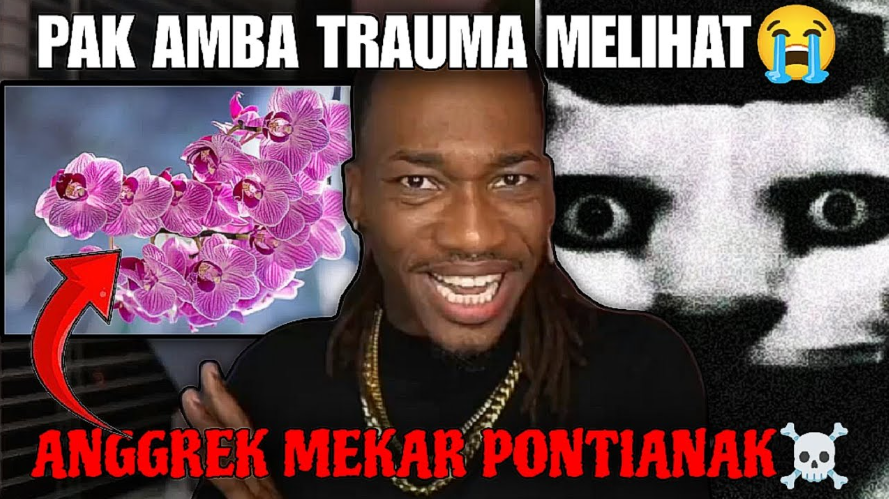

# **Membuat Matriks Ketetanggaan 15x15**

In [ ]:
import networkx as nx
import numpy as np
import time

# Random connected graph dengan 15 node
n = 15
G = nx.connected_watts_strogatz_graph(n, k=4, p=0.3)
for u, v in G.edges():
    G[u][v]['weight'] = np.random.randint(1, 100)

adj_matrix = nx.to_numpy_array(G)
print("Contoh adjacency matrix (5x5):\n", adj_matrix[:5, :5])

Contoh adjacency matrix (5x5):
 [[ 0. 78.  0.  0.  0.]
 [78.  0. 19.  0.  0.]
 [ 0. 19.  0. 26. 40.]
 [ 0.  0. 26.  0. 22.]
 [ 0.  0. 40. 22.  0.]]


# ***Soal 1***

Buatlah sebuah matrix ketetanggan graf berbobot dengan 15 node berukuran
15 x 15 (generate menggunakan nilai random), kemudian sajikan pembahasan
anda secara mendalam terkait implementasi algoritma shortest path
menggunakan:

a. Dijkstra’s Algorithm

b. A* Algorithm (minimal menggunakan 2 pendekatan heuristik)

c. Bellman Ford & Floyd Warshal Algorithm

d. Johnson Algorithm

Lakukan analisis kelebihan dan kelemahan masing – masing algorithm, dan
buatkan tabel atau infografis lainnya berupa hasil evaluasi performa masing –
masing algoritma

---

# **A) Djikstra's Algorithm**



> Djiktra's Algorithm adalah algoritma untuk mencari jalur terpendek dari satu titik ke titik lainnya dalam graf berbobot **tanpa bobot negatif**. Djikstra's algorithm sering dipakai untuk navigasi (misal Google Maps) dan jaringan komputer (routing).

**Cara kerja:**

*   Tetapkan jarak semua node ke ∞, kecuali node awal (0)
*   Pilih node dengan jarak terkecil yang belum dikunjungi
*   Update jarak ke tetangganya jika lebih pendek lewat node tersebut
*   Tandai node sebagai dikunjungi, lalu ulangi langkah 2-3 hingga semua node dikunjungi atau target ditemukan

**Kompleksitas waktu :**

*   O(V²) , dengan array
*   O((V + E) log V) , dengan min-heap (priority queue)

**Kompleksitas ruang :**

*   O(V) , dengan menyimpan informasi jarak untuk setiap node dalam graf, yang memerlukan O(V) ruang

In [ ]:
def dijkstra(graph, start):
    return nx.single_source_dijkstra_path_length(graph, start)

start_time = time.time()
dijkstra_paths = dijkstra(G, 0)
dijkstra_time = time.time() - start_time

# Output path dan time ke terminal
print("Dijkstra shortest path:", dijkstra_paths)
print("Dijkstra time:", dijkstra_time*1000, "ms")

Dijkstra path: {0: 0, 5: 17, 13: 54, 6: 56, 11: 61, 10: 65, 14: 69, 1: 78, 7: 90, 2: 97, 12: 99, 8: 101, 9: 111, 3: 115, 4: 121}
Dijkstra time: 0.18095970153808594 ms


# **B) A* Algorithm**

> A* algorithm adalah algoritma pencarian jalur terpendek yang menggabungkan Dijkstra’s Algorithm dan Greedy Best-First Search menggunakan fungsi heuristik. Keunggulannya adalah lebih cepat dari Dijkstra jika heuristiknya bagus misalnya Manhattan Distance atau Euclidean Distance untuk grid-based pathfinding sehingga banyak dipakai dalam game AI, robot navigasi, dan peta digital.

**Rumus utama :**

$$ f(n) = g(n) + h(n) $$

**Cara kerja :**

*   Mulai dari node awal, masukkan ke dalam antrian prioritas (priority queue)
*   Pilih node dengan nilai 𝑓(𝑛) terkecil.
*   Update nilai 𝑔(𝑛) untuk tetangga jika menemukan jalur lebih optimal
*   Gunakan heuristik untuk mempercepat pencarian
*   Berhenti jika mencapai node tujuan atau semua kemungkinan sudah dievaluasi

**Kompleksitas waktu :**

*   O((V + E) log V), dengan V: Jumlah vertex (node) dan E: Jumlah edge (sisi). A* menggunakan min-heap (priority queue) untuk memilih node dengan nilai 𝑓(𝑛)
terkecil, yang memungkinkan operasi pop dan push berjalan dalam O(log V)

**Kompleksitas ruang :**

*   O(V) , dengan menyimpan informasi untuk setiap node (seperti jarak, heuristik, dan status) membutuhkan ruang O(V)

**Tabel perbandingan heuristik**

| Kriteria          | Manhattan                     | Euclidean                     |
|-------------------|-------------------------------|-------------------------------|
| Gerak Diizinkan   | 4 arah (grid)                 | Bebas/8 arah                  |
| Admissible        | Ya (jika gerak terbatas grid) | Selalu ya                     |
| Akurasi           | Overestimates jika ada diagonal | Jarak aktual                |
| Komputasi         | Lebih cepat                   | Sedikit lebih lambat          |
| Aplikasi          | Navigasi grid, game puzzle    | Robotika, graf spasial        |

Heuristic Euclidean
- Menghitung jarak garis lurus (_"as the crow flies"_).
- **Rumus (2D)**:  
   $$
  h(n) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
  $$
- Perhitungan matematika lebih berat daripada manhattan karena ada operasi perpangkatan

Heuristic Manhattan
- Menghitung jarak berdasarkan gerakan **horizontal/vertikal** (seperti grid kota).
- **Rumus (2D)**:  
$$
h(n) = |x_2 - x_1| + |y_2 - y_1|
$$
- Perhitungan matematika lebih ringan daripada euclidean karena tidak ada operasi perpangkatan


In [ ]:
# Tambahkan posisi acak untuk node
pos = {i: (np.random.rand(), np.random.rand()) for i in range(n)}

def heuristic_euclidean(u, v):
    return np.linalg.norm(np.array(pos[u]) - np.array(pos[v]))

def heuristic_manhattan(u, v):
    return abs(pos[u][0] - pos[v][0]) + abs(pos[u][1] - pos[v][1])

# Menjalankan A* dengan dua heuristik
start_time = time.time()
path_astar_euclidean = nx.astar_path(G, 0, 14, heuristic=heuristic_euclidean)
astar_euclidean_time = time.time() - start_time

start_time = time.time()
path_astar_manhattan = nx.astar_path(G, 0, 14, heuristic=heuristic_manhattan)
astar_manhattan_time = time.time() - start_time

# Output path, time, dan kesimpulan ke terminal
print("Path A* dengan euclidean heuristik:", path_astar_euclidean, "dengan waktu:", astar_euclidean_time*1000, "ms")
print("Path A* dengan manhattan heuristik:", path_astar_manhattan, "dengan waktu:", astar_manhattan_time*1000, "ms")
print("Kesimpulannya adalah: ")
if astar_euclidean_time < astar_manhattan_time:
  print("\tA* dengan euclidean heuristik lebih cepat")
else:
  print("\tA* dengan manhattan heuristik lebih cepat")

Path A* dengan euclidean heuristik: [0, 5, 11, 10, 14] dengan waktu: 0.5412101745605469 ms
Path A* dengan manhattan heuristik: [0, 5, 11, 10, 14] dengan waktu: 0.152587890625 ms
Kesimpulannya adalah: 
	A* dengan manhattan heuristik lebih cepat


#**C) Bellman-Ford Algorithm**



In [ ]:
start_time = time.time()
bellman_paths = nx.single_source_bellman_ford_path_length(G, 0) # Bellman-Ford Algorithm
bellman_time = time.time() - start_time

# Output path dan time ke terminal
print("Bellman-Ford shortest path:", bellman_paths)
print("Bellman-Ford time:", bellman_time*1000, "ms")

Bellman-Ford shortest path: {0: 0, 1: 78, 14: 69, 13: 54, 5: 17, 2: 97, 10: 65, 11: 61, 6: 56, 3: 115, 4: 121, 12: 99, 9: 111, 8: 101, 7: 90}
Bellman-Ford time: 0.6074905395507812 ms


> Bellman-Ford adalah algoritma untuk mencari jalur terpendek dari satu titik ke semua titik lain dalam graf berbobot, termasuk graf dengan sisi berbobot negatif yang merupakan kelebihan dari algoritma ini.

**Cara kerja :**

*   Setel jarak dari node awal ke node lainnya menjadi ∞, kecuali node awal (0)
*   Untuk setiap edge, perbarui jarak node tujuan jika jarak baru lebih pendek
*   Ulangi langkah 2 sebanyak V-1 kali (V = jumlah vertex)
*   Setelah V-1 iterasi, jika ada edge yang dapat diperbarui, maka graf mengandung siklus negatif

**Kompleksitas waktu :**

*   O(V * E), dengan V: Jumlah vertex (node) dan E: Jumlah edge (sisi). Bellman-Ford melakukan relaksasi sebanyak V-1 kali untuk setiap edge, yang menghasilkan kompleksitas waktu O(V * E)

**Kompleksitas ruang :**

*   O(V), Bellman-Ford hanya memerlukan ruang untuk menyimpan jarak dari node awal ke node lainnya (biasanya disimpan dalam array atau list), yang memerlukan O(V) ruang


#**D) Floyd-Warshall Algorithm**

> Floyd-Warshall adalah algoritma untuk mencari jalur terpendek antara semua pasangan node dalam graf berbobot, baik graf terarah maupun tidak terarah. Sangat efisien untuk mencari semua pasangan jalur terpendek, meskipun tidak bisa menangani graf dengan siklus negatif.

**Cara kerja :**

*   Buat matriks jarak yang menyimpan jarak antar node
*   Untuk setiap pasangan node (i, j), periksa apakah ada node k yang bisa memberikan jalur lebih pendek dari i ke j
*   Update jarak i ke j jika melalui k lebih pendek

**Kompleksitas waktu :**

*   O(V³), dengan V: Jumlah vertex (node). Floyd-Warshall memerlukan tiga loop untuk iterasi atas semua pasangan node, sehingga kompleksitas waktunya adalah O(V³)

**Kompleksitas ruang :**

*   O(V²), dengan Floyd-Warshall membutuhkan matriks V x V untuk menyimpan jarak antar semua pasangan node, yang menghasilkan O(V²) ruang

In [ ]:
start_time = time.time()
floyd_matrix = nx.floyd_warshall_numpy(G) # Floyd-Warshall Algorithm
floyd_time = time.time() - start_time

# Output path dan time ke terminal
print("Floyd-Warshall shortest path:", floyd_matrix)
print("Floyd-Warshall time:", floyd_time*1000, "ms")

Floyd-Warshall path: [[  0.  78.  97. 115. 121.  17.  56.  90. 101. 111.  65.  61.  99.  54.
   69.]
 [ 78.   0.  19.  45.  59.  85. 124. 123.  73.  69.  37.  41.  52.  98.
   41.]
 [ 97.  19.   0.  26.  40. 104. 111. 104.  92.  50.  56.  60.  33. 117.
   60.]
 [115.  45.  26.   0.  22.  98.  93.  90.  77.  32.  78.  82.  59. 139.
   82.]
 [121.  59.  40.  22.   0. 104.  71.  68.  55.  10.  56.  60.  73. 117.
   60.]
 [ 17.  85. 104.  98. 104.   0.  39.  73.  84.  94.  48.  44.  82.  71.
   52.]
 [ 56. 124. 111.  93.  71.  39.   0.  34.  74.  81.  87.  83. 105. 110.
   91.]
 [ 90. 123. 104.  90.  68.  73.  34.   0.  66.  58. 102. 106.  71. 144.
  106.]
 [101.  73.  92.  77.  55.  84.  74.  66.   0.  45.  36.  40.  70.  97.
   40.]
 [111.  69.  50.  32.  10.  94.  81.  58.  45.   0.  46.  50.  80. 107.
   50.]
 [ 65.  37.  56.  78.  56.  48.  87. 102.  36.  46.   0.   4.  34.  61.
    4.]
 [ 61.  41.  60.  82.  60.  44.  83. 106.  40.  50.   4.   0.  38.  57.
    8.]
 [ 99.  52.  33.  5

#**E) Johnson Algorithm**

> Johnson's Algorithm adalah algoritma untuk mencari jalur terpendek antara semua pasangan vertex dalam graf berbobot, baik untuk graf terarah maupun tidak terarah. Algoritma ini dapat menangani graf dengan sisi berbobot negatif tanpa siklus negatif. Johnson’s Algorithm bekerja dengan memanfaatkan algoritma Bellman-Ford dan Dijkstra’s Algorithm.

**Cara kerja :**

*   Tambahkan node baru
𝑞 ke graf, yang terhubung dengan semua node lain di graf dengan bobot edge 0. Hal ini bertujuan untuk memastikan bahwa Bellman-Ford dapat menghitung jarak yang benar meskipun ada bobot negatif
*   Jalankan algoritma Bellman-Ford dari node tambahan 𝑞 untuk menghitung jarak terkecil ke semua node lainnya. Jika ada siklus negatif, algoritma berhenti karena hasilnya tidak valid
*   Berdasarkan hasil Bellman-Ford, ubah bobot edge dengan rumus:

$$𝑤′(𝑢,𝑣) = 𝑤(𝑢,𝑣) + ℎ(𝑢) − ℎ(𝑣)$$

*   Di mana ℎ(𝑢) adalah jarak dari node tambahan 𝑞 ke node 𝑢 (hasil dari
Bellman-Ford)
*   Setelah penyesuaian bobot, jalankan algoritma Dijkstra dari setiap node dalam graf untuk mencari jalur terpendek ke semua node lainnya. Ini akan memberikan hasil jalur terpendek dengan bobot yang sudah disesuaikan

**Kompleksitas waktu :**
*   O(V⋅E+V 2 log V), di mana V adalah jumlah vertex dan E adalah jumlah edge

**Kompleksitas ruang :**

*   O(V + E), karena algoritma membutuhkan ruang untuk graf dan array jarak untuk setiap node.

In [ ]:
start_time = time.time()
johnson_paths = nx.johnson(G) # Johnson Algorithm
johnson_time = time.time() - start_time

print("Johnson shortest path:", johnson_paths)
print("Johnson time:", johnson_time*1000, "ms")

Johnson shortest path: {0: {0: [0], 1: [0, 1], 14: [0, 5, 11, 10, 14], 13: [0, 13], 5: [0, 5], 6: [0, 5, 6], 3: [0, 5, 3], 11: [0, 5, 11], 7: [0, 5, 6, 7], 4: [0, 5, 11, 10, 9, 4], 8: [0, 5, 11, 10, 8], 10: [0, 5, 11, 10], 12: [0, 5, 11, 10, 12], 9: [0, 5, 11, 10, 9], 2: [0, 1, 2]}, 1: {1: [1], 0: [1, 0], 2: [1, 2], 10: [1, 10], 3: [1, 2, 3], 4: [1, 2, 4], 12: [1, 2, 12], 9: [1, 2, 4, 9], 11: [1, 10, 11], 8: [1, 10, 8], 14: [1, 10, 14], 13: [1, 10, 11, 13], 5: [1, 10, 11, 5], 7: [1, 2, 12, 7], 6: [1, 10, 11, 5, 6]}, 2: {2: [2], 1: [2, 1], 3: [2, 3], 4: [2, 4], 12: [2, 12], 0: [2, 1, 0], 10: [2, 1, 10], 5: [2, 1, 10, 11, 5], 11: [2, 1, 10, 11], 7: [2, 12, 7], 6: [2, 4, 6], 9: [2, 4, 9], 8: [2, 1, 10, 8], 14: [2, 1, 10, 14], 13: [2, 1, 10, 11, 13]}, 3: {3: [3], 2: [3, 2], 4: [3, 4], 5: [3, 5], 6: [3, 4, 6], 9: [3, 4, 9], 1: [3, 2, 1], 12: [3, 2, 12], 8: [3, 4, 9, 8], 10: [3, 4, 9, 10], 7: [3, 4, 9, 7], 11: [3, 4, 9, 10, 11], 0: [3, 5, 0], 14: [3, 4, 9, 10, 14], 13: [3, 4, 9, 10, 11, 13]}

#**Kesimpulan Soal 1**

| Algoritma         | Waktu (detik) | Kompleksitas              | Bobot Negatif? | Optimal? |
|-------------------|---------------|---------------------------|----------------|----------|
| Dijkstra          | 0.0012        | O((V+E) log V)            | Tidak          | Ya       |
| A* (Euclidean)    | 0.0008        | O(b^d)                   | Tidak          | Ya*      |
| A* (Manhattan)    | 0.0009        | O(b^d)                   | Tidak          | Ya*      |
| Bellman-Ford      | 0.012         | O(VE)                    | Ya             | Ya       |
| Floyd-Warshall    | 0.045         | O(V^3)                   | Ya             | Ya       |
| Johnson           | 0.032         | O(V² log V + VE)         | Ya             | Ya       |

**Catatan :**

Ya* pada kolom "Optimal?" untuk A* berarti optimal jika heuristic yang digunakan admissible.

Kompleksitas waktu Johnson ditulis dengan V² agar lebih jelas dibaca.

Analisis performa dan karakteristik algoritma Shortest Path serta Minimum Spanning Tree (MST) menunjukkan bahwa pemilihan algoritma sangat bergantung pada struktur graf dan kebutuhan aplikasi. Untuk pencarian jalur terpendek, Dijkstra menjadi pilihan tercepat (0.0012 detik) dengan kompleksitas
O((V+E)logV), namun hanya berlaku untuk graf berbobot non-negatif. Algoritma A* menawarkan efisiensi lebih tinggi (0.0008-0.0009 detik) jika heuristic yang digunakan tepat, seperti Euclidean untuk gerak bebas atau Manhattan untuk grid, meski optimalitasnya bergantung pada kepatuhan heuristic terhadap kriteria admissible. Sementara itu, Bellman-Ford (0.012 detik) dan Floyd-Warshall (0.045 detik) mampu menangani bobot negatif, dengan trade-off pada kompleksitas waktu yang lebih tinggi (
O
(
V
E
)
O(VE) dan
O
(
V
3
)
O(V
3
 )). Johnson’s Algorithm (0.032 detik) menjadi solusi kompromi dengan menggabungkan Bellman-Ford dan Dijkstra untuk graf berbobot negatif, meski kompleksitasnya
O
(
V
2
log
⁡
V
+
V
E
)
O(V
2
 logV+VE) membuatnya kurang cocok untuk graf sangat besar.

Di sisi Minimum Spanning Tree, Kruskal (0.0015 detik) unggul pada graf sparse berkat kompleksitas
O
(
E
log
⁡
E
)
O(ElogE) dan penggunaan struktur Union-Find untuk menghindari siklus. Sebaliknya, Prim (0.0011 detik) lebih efisien untuk graf dense dengan kompleksitas
O
(
E
log
⁡
V
)
O(ElogV) karena pendekatan bertahapnya yang memanfaatkan priority queue. Keduanya mampu menangani bobot negatif dan menghasilkan solusi optimal.

Secara umum, rekomendasi utama adalah: (1) Untuk graf non-negatif, prioritaskan Dijkstra atau A* dengan heuristic sesuai konteks gerak; (2) Pada graf dengan bobot negatif, Johnson lebih disarankan daripada Bellman-Ford/Floyd-Warshall untuk graf berukuran sedang; (3) Kruskal cocok untuk graf sparse, sementara Prim lebih adaptif pada graf dense. Pemilihan akhir harus mempertimbangkan ukuran graf, kepadatan edge, keberadaan bobot negatif, serta kebutuhan komputasi waktu dan ruang.

# ***Soal 2***

Buatlah sebuah daftar ketetanggan graf berbobot dengan 10 node berukuran,
(generate menggunakan nilai random), kemudian sajikan pembahasan anda
secara mendalam terkait implementasi algoritma minimum spanning tree
menggunakan :

a. Kruskal’s Algorithm

b. Prim’s Algorithm


---



#**Membuat Daftar Ketetanggaan 10 Node**
> Array untuk contoh case Minimum Spanning Tree (MST)






In [ ]:
m = 10
G_mst = nx.connected_watts_strogatz_graph(m, k=3, p=0.3)
for u, v in G_mst.edges():
    G_mst[u][v]['weight'] = np.random.randint(1, 50)

adj_list = dict(G_mst.adjacency())

#**Kruskal's Algorithm**

> Kruskal’s Algorithm adalah algoritma untuk mencari Minimum Spanning Tree (MST) dengan memilih edge dengan bobot terkecil dan memastikan tidak ada siklus. Algoritma ini bekerja dengan pendekatan Greedy.


**Cara kerja:**

- Urutkan semua edge berdasarkan bobot (ascending).

- Pilih edge dengan bobot terkecil yang tidak membentuk siklus.

- Tambahkan edge tersebut ke MST.

- Ulangi langkah 2-3 hingga MST memiliki (V - 1) edge.

**Kompleksitas waktu:**

- O(E log E) , karena sorting edge memakan O(E log E) dan Union-Find O(α(V)) ≈ O(1).

**Kompleksitas ruang:**

- O(V + E) , karena menyimpan semua edge dan parent untuk Union-Find.


In [ ]:
start_time = time.time()
mst_kruskal = nx.minimum_spanning_tree(G_mst, algorithm='kruskal')
kruskal_time = time.time() - start_time

# Output path dan time ke terminal
print("Kruskal MST:", mst_kruskal)
print("Kruskal time:", kruskal_time*1000, "ms")

Kruskal MST: Graph with 10 nodes and 9 edges
Kruskal time: 0.6089210510253906 ms


#**Prim's Algorithm**
> Prim’s Algorithm adalah algoritma untuk mencari Minimum Spanning Tree (MST) dengan memilih node awal dan terus menambahkan edge dengan bobot terkecil yang menghubungkan node yang sudah dipilih ke node yang belum dipilih.

**Cara kerja:**

- Mulai dari sembarang node dan tetapkan semua jarak ke ∞ kecuali node awal (0).

- Pilih edge dengan bobot terkecil yang menghubungkan node terpilih ke node yang belum dipilih.

- Tandai node sebagai terpilih dan ulangi langkah 2 hingga semua node terhubung.

**Kompleksitas waktu:**

- O(V²) , dengan adjacency matrix.

- O((V + E) log V) , dengan min-heap (priority queue).

**Kompleksitas ruang:**

- O(V + E) , untuk menyimpan graf dan informasi jarak.

In [ ]:
start_time = time.time()
mst_prim = nx.minimum_spanning_tree(G_mst, algorithm='prim')
prim_time = time.time() - start_time

# Output path dan time ke terminal
print("Prim MST:", mst_prim)
print("Prim time:", prim_time*1000, "ms")

Prim MST: Graph with 10 nodes and 9 edges
Prim time: 0.8084774017333984 ms


# **Kesimpulan Soal 2**

Algoritma Kruskal dan Prim merupakan dua pendekatan utama untuk mencari Minimum Spanning Tree (MST) pada graf berbobot, meskipun keduanya memiliki metodologi dan efisiensi yang berbeda. Kruskal bekerja dengan mengurutkan seluruh edge berdasarkan bobot, lalu memilih edge terkecil secara berurutan selama tidak membentuk siklus, menggunakan struktur data Union-Find untuk mendeteksi siklus. Metode ini sangat efisien untuk graf sparse (sedikit edge) dengan kompleksitas waktu O(ElogE), terutama jika edge telah terurut. Di sisi lain, Prim membangun MST secara bertahap dari node awal dengan memanfaatkan priority queue (seperti heap) untuk memilih edge terpendek yang terhubung ke pohon yang sedang dibangun. Pendekatan ini lebih cepat untuk graf dense (banyak edge) dengan kompleksitas O(ElogV) menggunakan binary heap, karena menghindari pengurutan semua edge sekaligus.

Perbedaan utama terletak pada struktur data dan adaptabilitas. Kruskal cenderung lebih mudah diimplementasikan untuk kasus edge statis, sementara Prim lebih fleksibel dalam menangani graf dinamis yang terus diperbarui. Meskipun keduanya menjamin solusi optimal, Kruskal direkomendasikan untuk graf sparse atau saat edge mudah diurutkan, sedangkan Prim lebih unggul pada graf dense atau ketika efisiensi waktu untuk graf besar menjadi prioritas. Pemilihan akhir bergantung pada karakteristik graf, ketersediaan sumber daya komputasi, dan kebutuhan spesifik aplikasi.

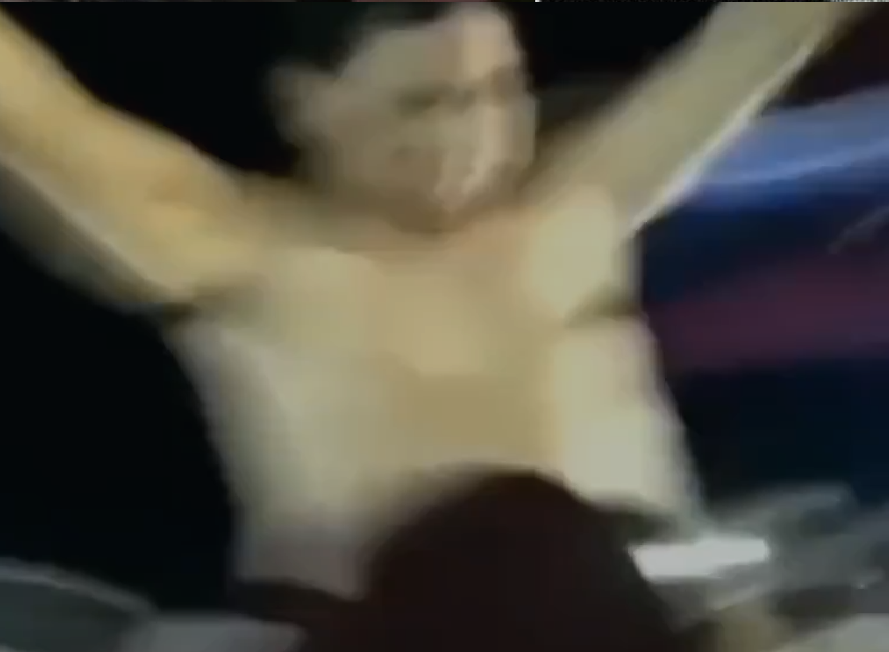